In [2]:
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/tokyo_2021.csv')
df.head()

Unnamed: 0         Country  Gold  Silver  Bronze  Total
0           1  Estados Unidos    39      41      33    113
1           2           China    38      32      18     88
2           3           Japão    27      14      17     58
3           4    Grã-Bretanha    22      21      22     65
4           5             ROC    20      28      23     71

In [4]:
df.tail()

Unnamed: 0   Country  Gold  Silver  Bronze  Total
88          89      Gana     0       0       1      1
89          90   Granada     0       0       1      1
90          91    Kuwait     0       0       1      1
91          92  Moldávia     0       0       1      1
92          93     Síria     0       0       1      1

In [5]:
df.shape

(93, 6)

In [6]:
df.size

558

In [7]:
df.dtypes

Unnamed: 0     int64
Country       object
Gold           int64
Silver         int64
Bronze         int64
Total          int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  93 non-null     int64 
 1   Country     93 non-null     object
 2   Gold        93 non-null     int64 
 3   Silver      93 non-null     int64 
 4   Bronze      93 non-null     int64 
 5   Total       93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.5+ KB


In [10]:
df.describe()

Unnamed: 0       Gold     Silver     Bronze       Total
count   93.000000  93.000000  93.000000  93.000000   93.000000
mean    47.000000   3.655914   3.634409   4.322581   11.612903
std     26.990739   7.022471   6.626339   6.210372   19.091332
min      1.000000   0.000000   0.000000   0.000000    1.000000
25%     24.000000   0.000000   0.000000   1.000000    2.000000
50%     47.000000   1.000000   1.000000   2.000000    4.000000
75%     70.000000   3.000000   4.000000   5.000000   11.000000
max     93.000000  39.000000  41.000000  33.000000  113.000000

In [11]:
df.corr()

Unnamed: 0      Gold    Silver    Bronze     Total
Unnamed: 0    1.000000 -0.648704 -0.592858 -0.633411 -0.650437
Gold         -0.648704  1.000000  0.929046  0.862425  0.970840
Silver       -0.592858  0.929046  1.000000  0.862646  0.969439
Bronze       -0.633411  0.862425  0.862646  1.000000  0.941941
Total        -0.650437  0.970840  0.969439  0.941941  1.000000

In [13]:
df.describe().corr().T

Unnamed: 0      Gold    Silver    Bronze     Total
Unnamed: 0    1.000000  0.723297  0.735094  0.709326  0.811985
Gold          0.723297  1.000000  0.999724  0.997383  0.837758
Silver        0.735094  0.999724  1.000000  0.996000  0.848383
Bronze        0.709326  0.997383  0.996000  1.000000  0.798476
Total         0.811985  0.837758  0.848383  0.798476  1.000000

In [14]:
df.isnull().sum()

Unnamed: 0    0
Country       0
Gold          0
Silver        0
Bronze        0
Total         0
dtype: int64

In [16]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
88    False
89    False
90    False
91    False
92    False
Length: 93, dtype: bool

In [17]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    0.000000
Gold          3.517520
Silver        3.672700
Bronze        2.371108
Total         3.218625
dtype: float64

In [18]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    47.000000
Gold           3.655914
Silver         3.634409
Bronze         4.322581
Total         11.612903
dtype: float64

In [19]:
df.min()

Unnamed: 0           1
Country       Alemanha
Gold                 0
Silver               0
Bronze               0
Total                1
dtype: object

In [21]:
df.max()

Unnamed: 0       93
Country       Índia
Gold             39
Silver           41
Bronze           33
Total           113
dtype: object

In [22]:
df.head()

Unnamed: 0         Country  Gold  Silver  Bronze  Total
0           1  Estados Unidos    39      41      33    113
1           2           China    38      32      18     88
2           3           Japão    27      14      17     58
3           4    Grã-Bretanha    22      21      22     65
4           5             ROC    20      28      23     71

In [23]:
df.columns

Index(['Unnamed: 0', 'Country', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

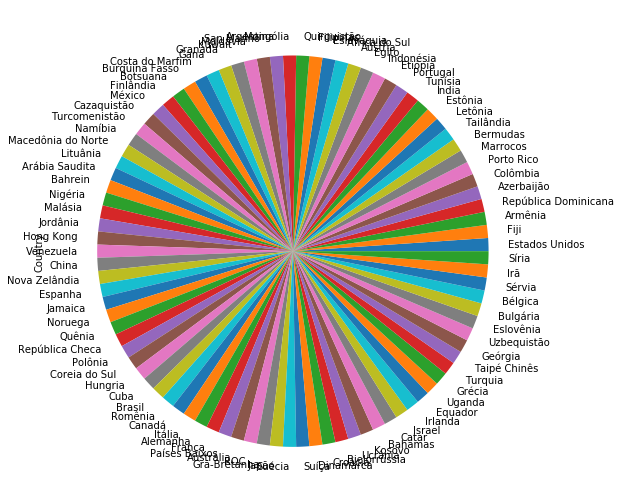

In [24]:
plt.figure(figsize = (15,9))
df.Country.value_counts().plot(kind='pie')

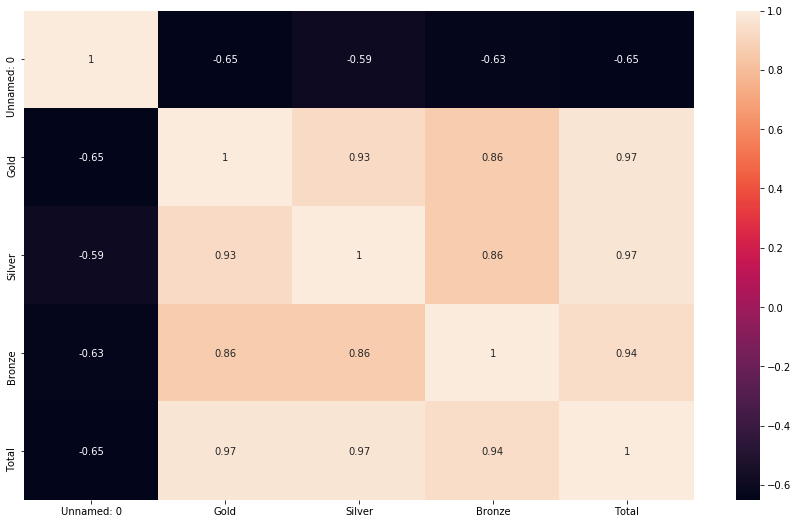

In [25]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

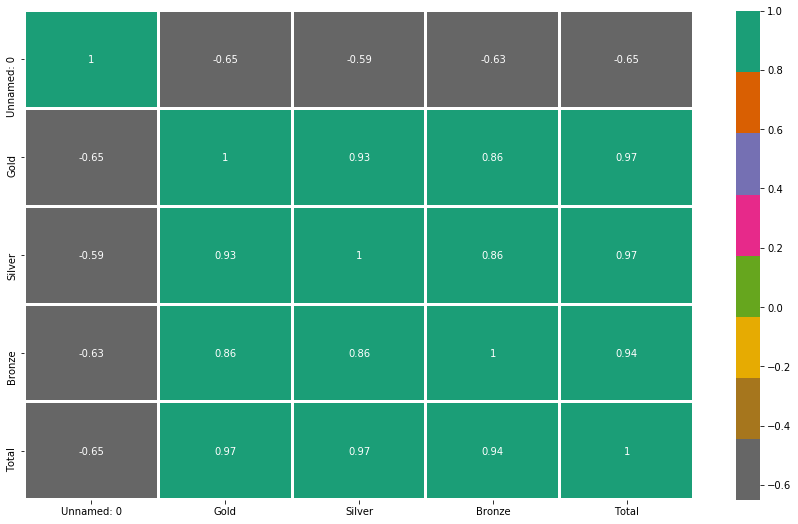

In [26]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

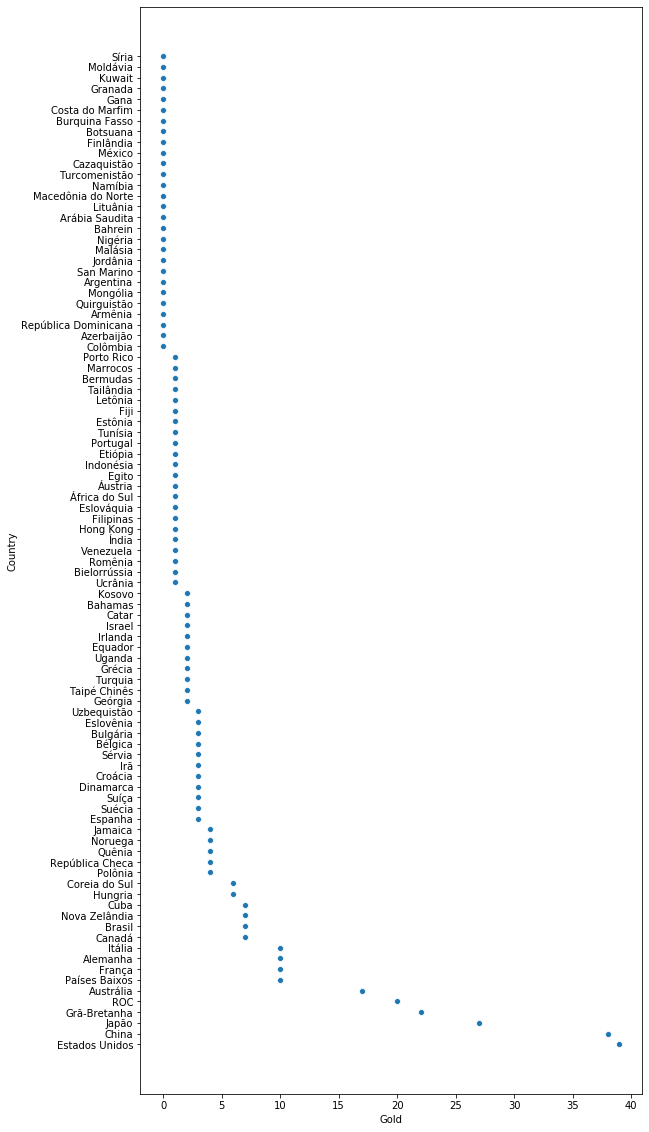

In [35]:
plt.figure(figsize=(9,20))
sns.scatterplot(x='Gold',y='Country',data=df)

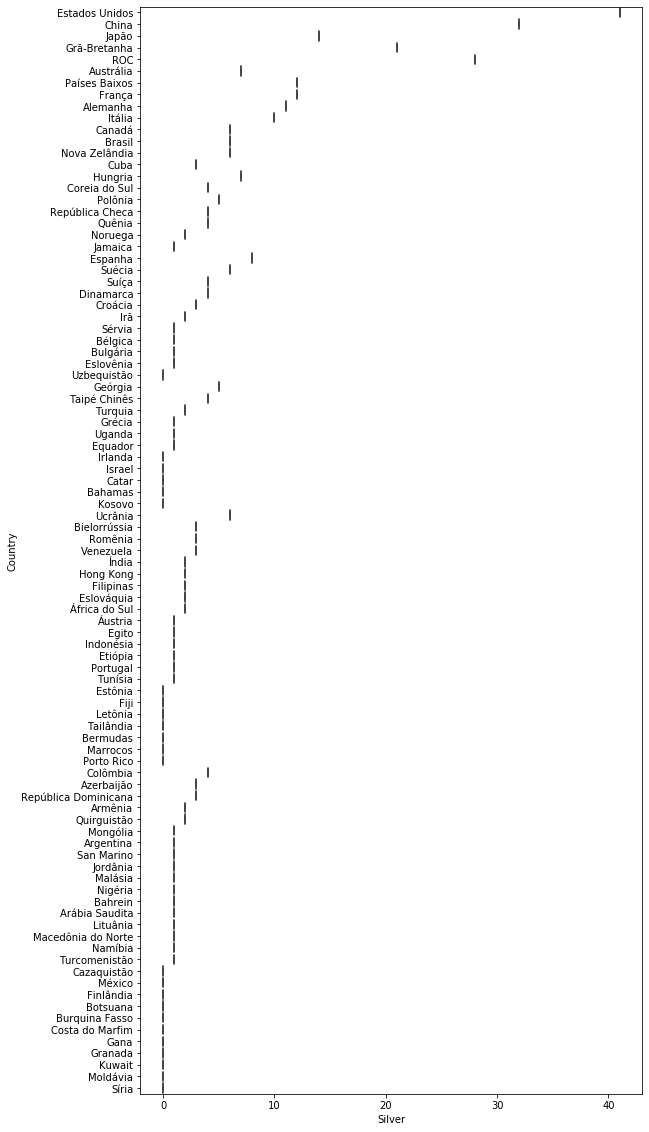

In [36]:
plt.figure(figsize=(9,20))
sns.boxplot(x='Silver',y='Country',data=df)

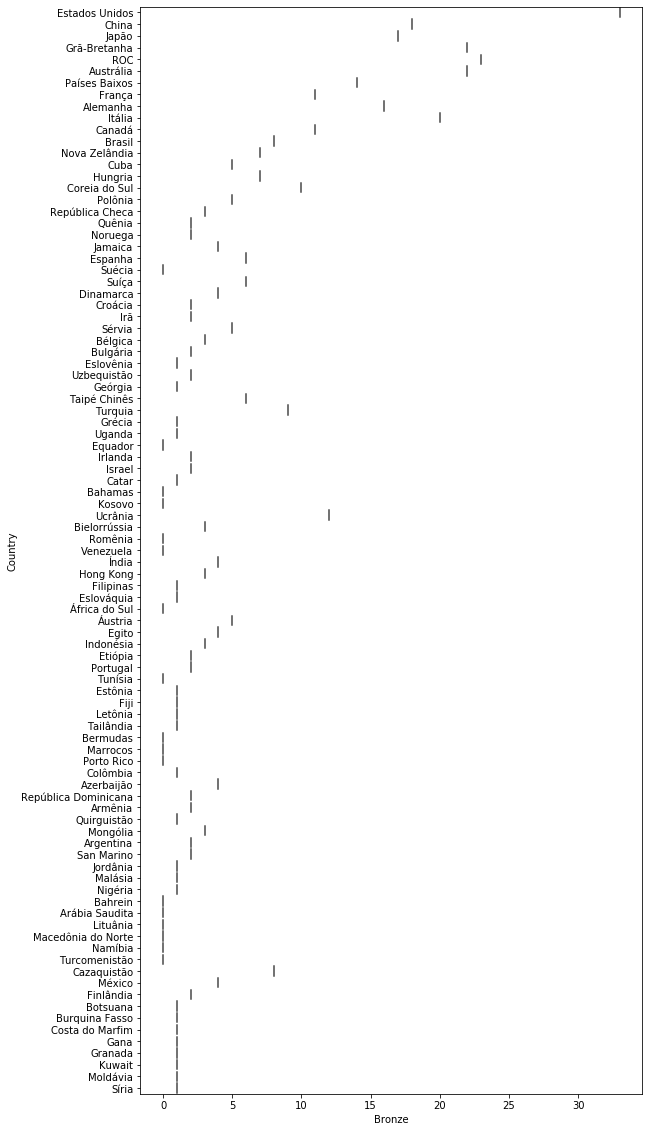

In [37]:
plt.figure(figsize=(9,20))
sns.boxenplot(x='Bronze',y='Country',data=df)

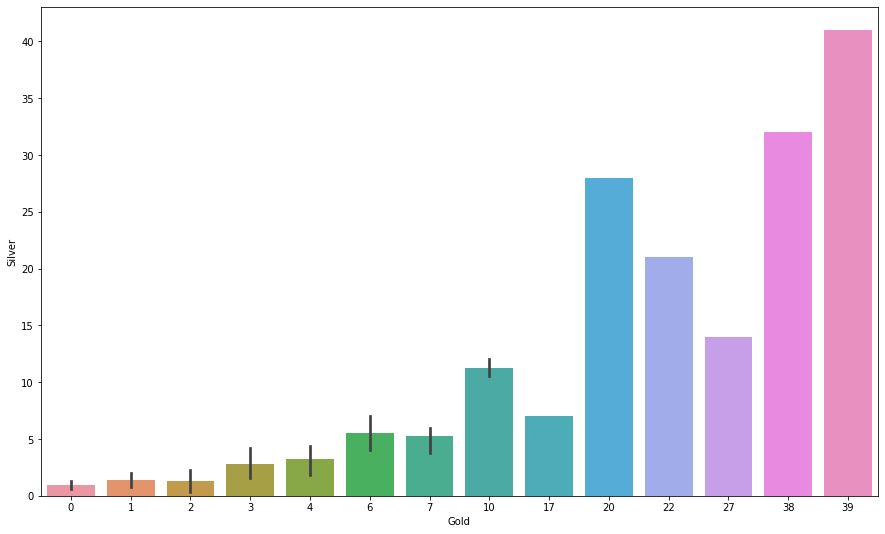

In [38]:
plt.figure(figsize=(15,9))
sns.barplot(x='Gold',y='Silver',data=df)

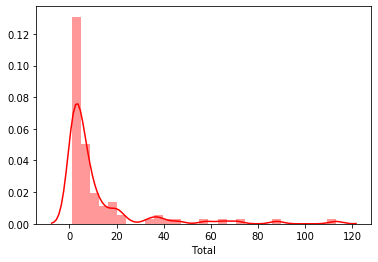

In [42]:
sns.distplot(df['Total'],color='red')

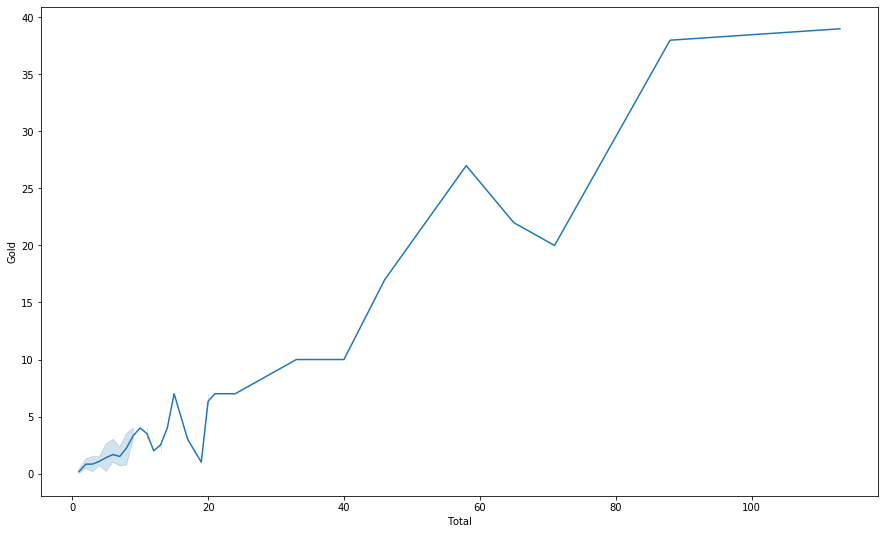

In [45]:
plt.figure(figsize=(15,9))
sns.lineplot(x='Total',y='Gold',data=df)

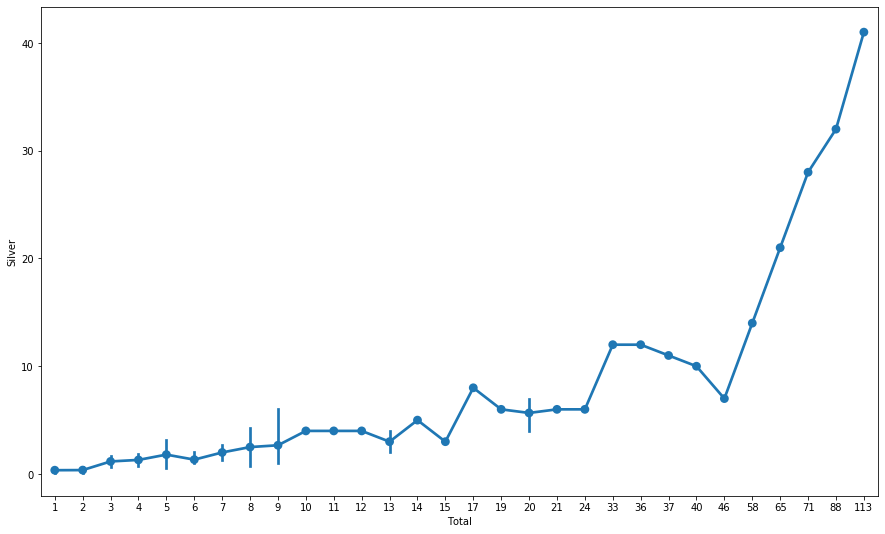

In [46]:
plt.figure(figsize=(15,9))
sns.pointplot(x='Total',y='Silver',data=df)

<Figure size 1080x648 with 0 Axes>

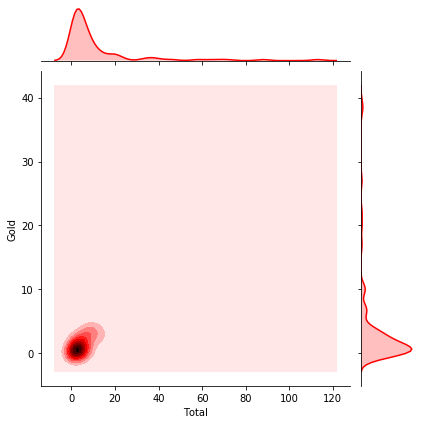

In [47]:
plt.figure(figsize=(15,9))
sns.jointplot(x='Total',y='Gold',data=df,kind='kde',color='red')

In [48]:
df.columns

Index(['Unnamed: 0', 'Country', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

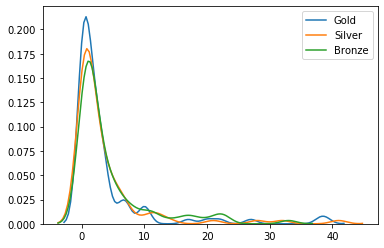

In [49]:
sns.kdeplot(df['Gold'])
sns.kdeplot(df['Silver'])
sns.kdeplot(df['Bronze'])

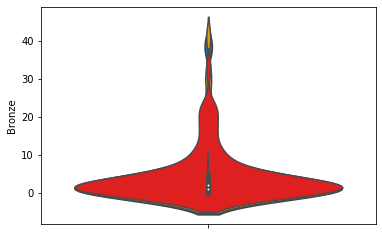

In [50]:
sns.violinplot(y="Gold",data=df)
sns.violinplot(y="Silver",data=df,color='orange')
sns.violinplot(y="Bronze",data=df,color='red')

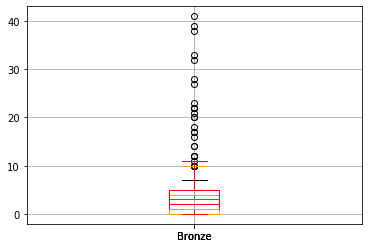

In [51]:
df.boxplot(column="Gold")
df.boxplot(column="Silver",color='orange')
df.boxplot(column="Bronze",color='red')

In [53]:
import sweetviz as sv

In [54]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [55]:
from IPython.display import IFrame

In [57]:
IFrame(src='Analyze.html',width=1000,height=600)

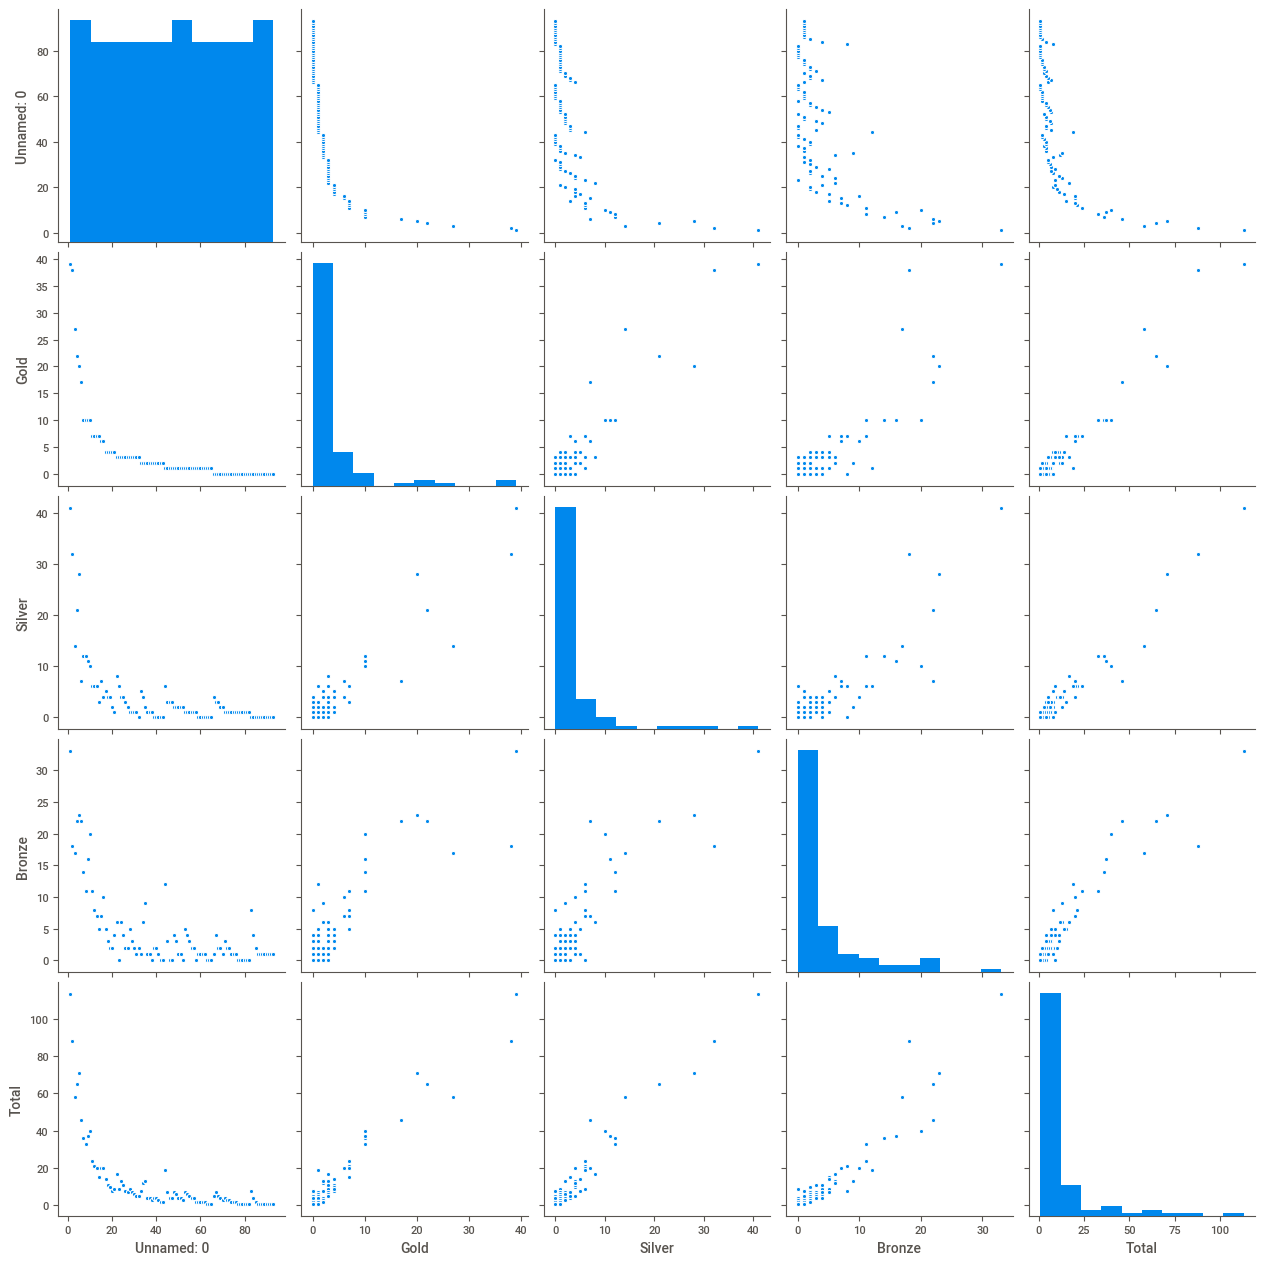

In [58]:
sns.pairplot(df)

In [60]:
df[df['Gold']>5]['Country']

0     Estados Unidos
1              China
2              Japão
3       Grã-Bretanha
4                ROC
5          Austrália
6      Países Baixos
7             França
8           Alemanha
9             Itália
10            Canadá
11            Brasil
12     Nova Zelândia
13              Cuba
14           Hungria
15     Coreia do Sul
Name: Country, dtype: object

In [61]:
df[df['Gold']>5]['Country']

0     Estados Unidos
1              China
2              Japão
3       Grã-Bretanha
4                ROC
5          Austrália
6      Países Baixos
7             França
8           Alemanha
9             Itália
10            Canadá
11            Brasil
12     Nova Zelândia
13              Cuba
14           Hungria
15     Coreia do Sul
Name: Country, dtype: object

In [62]:
df[df['Silver']>5]['Country']

0     Estados Unidos
1              China
2              Japão
3       Grã-Bretanha
4                ROC
5          Austrália
6      Países Baixos
7             França
8           Alemanha
9             Itália
10            Canadá
11            Brasil
12     Nova Zelândia
14           Hungria
21           Espanha
22            Suécia
43           Ucrânia
Name: Country, dtype: object

In [63]:
df[df['Bronze']>5]['Country']

0     Estados Unidos
1              China
2              Japão
3       Grã-Bretanha
4                ROC
5          Austrália
6      Países Baixos
7             França
8           Alemanha
9             Itália
10            Canadá
11            Brasil
12     Nova Zelândia
14           Hungria
15     Coreia do Sul
21           Espanha
23             Suíça
33      Taipé Chinês
34           Turquia
43           Ucrânia
82       Cazaquistão
Name: Country, dtype: object

In [64]:
x = df[df['Gold'] > 5]['Country']
y = df[df['Gold'] > 5]['Gold']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [65]:
df.head(3)

Unnamed: 0         Country  Gold  Silver  Bronze  Total
0           1  Estados Unidos    39      41      33    113
1           2           China    38      32      18     88
2           3           Japão    27      14      17     58

In [66]:
df=df.drop(['Unnamed: 0'],axis='columns')

In [73]:
df[df['Gold'] < 5]['Country']

16            Polônia
17    República Checa
18             Quênia
19            Noruega
20            Jamaica
           ...       
88               Gana
89            Granada
90             Kuwait
91           Moldávia
92              Síria
Name: Country, Length: 77, dtype: object

In [74]:
df[df['Gold'] < 5]['Country'].count()

77

In [75]:
y = df[df['Gold'] < 5]['Country']
x = df[df['Gold'] < 5]['Gold']
fig.show()

In [77]:
a = []
for i in df['Country'].tail(5):
    a.append(i)
df.tail()

Country  Gold  Silver  Bronze  Total
88      Gana     0       0       1      1
89   Granada     0       0       1      1
90    Kuwait     0       0       1      1
91  Moldávia     0       0       1      1
92     Síria     0       0       1      1

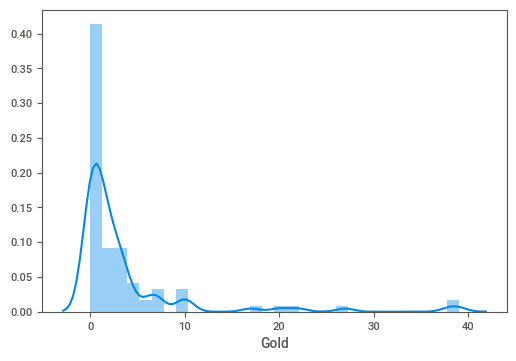

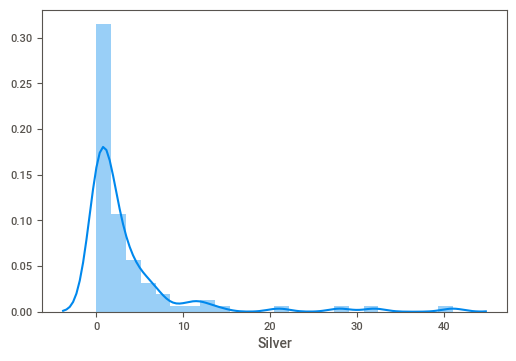

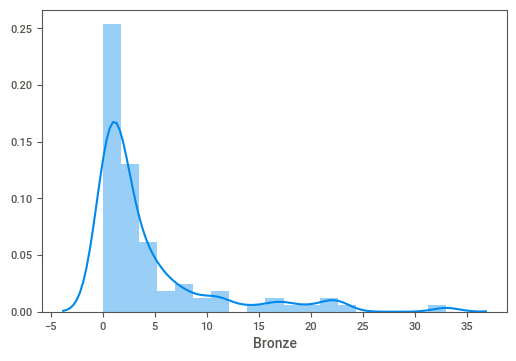

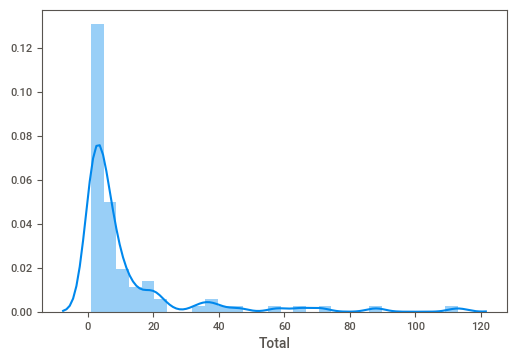

In [80]:
x = df.drop(['Country'],axis = 1)
for i in x.columns:
    sns.distplot(x[i],kde = True)
    plt.show()

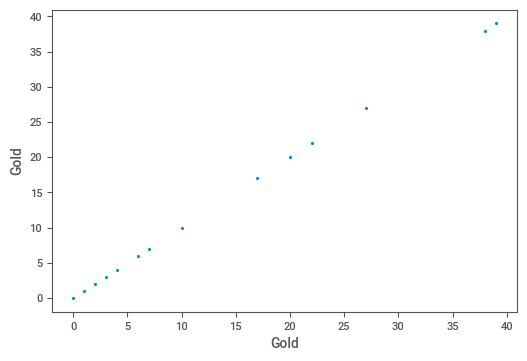

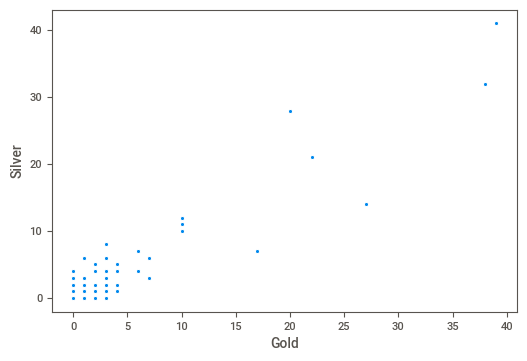

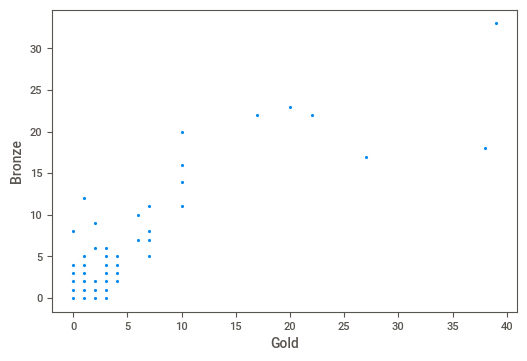

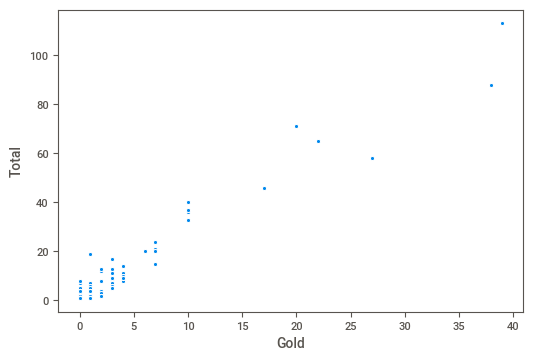

In [82]:
x = df.drop(['Country'],axis = 1)
for i in x.columns:
    sns.scatterplot(x= 'Gold',y=x[i],data=df)
    plt.show()

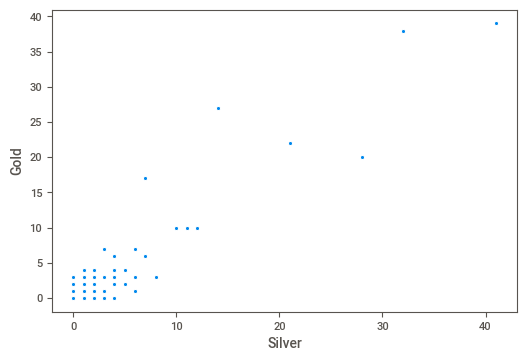

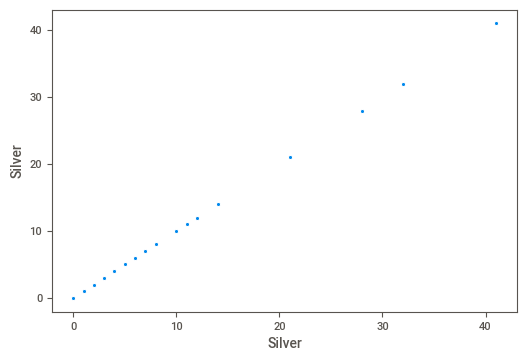

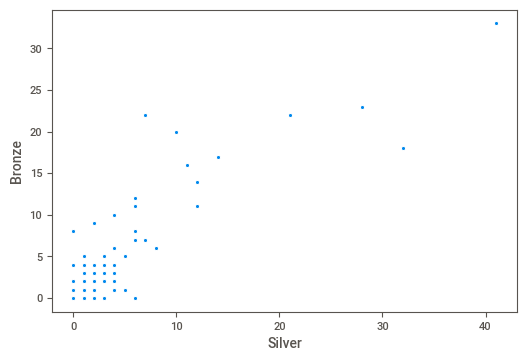

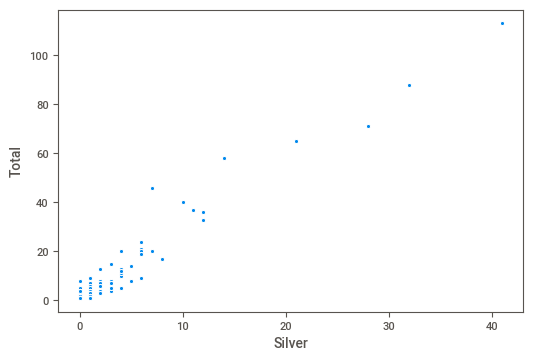

In [83]:
x = df.drop(['Country'],axis = 1)
for i in x.columns:
    sns.scatterplot(x= 'Silver',y=x[i],data=df)
    plt.show()

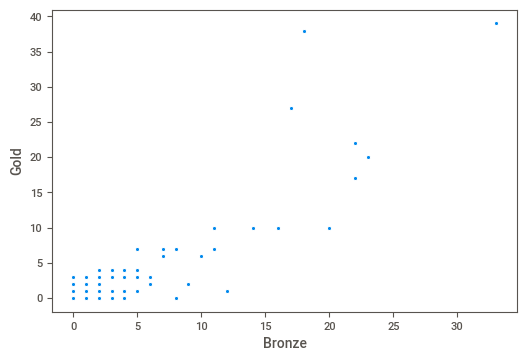

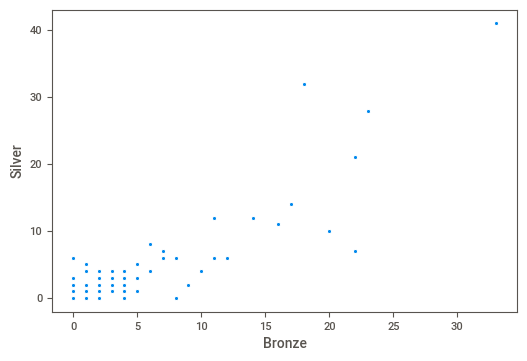

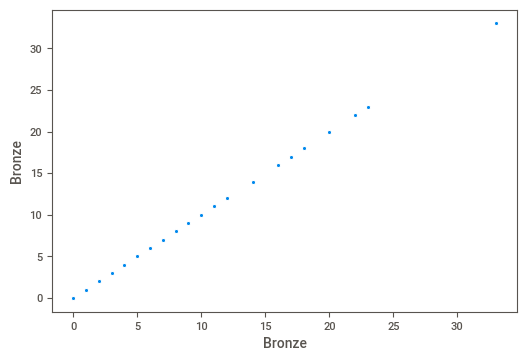

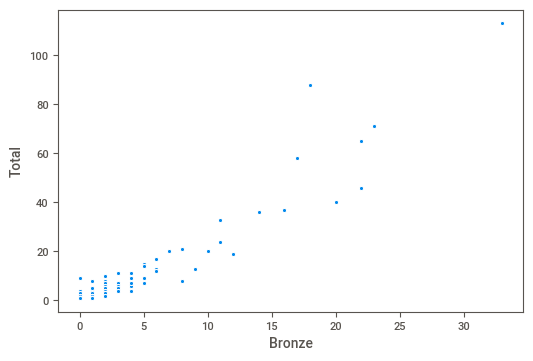

In [84]:
x = df.drop(['Country'],axis = 1)
for i in x.columns:
    sns.scatterplot(x= 'Bronze',y=x[i],data=df)
    plt.show()

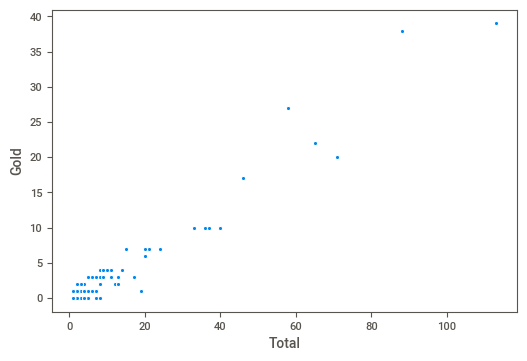

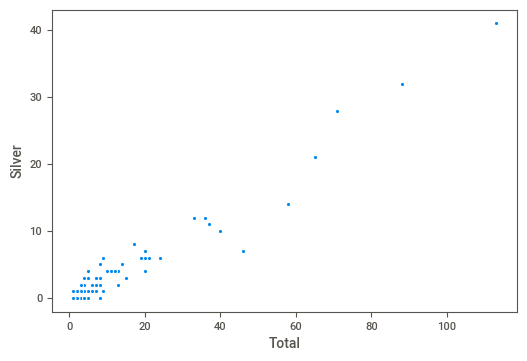

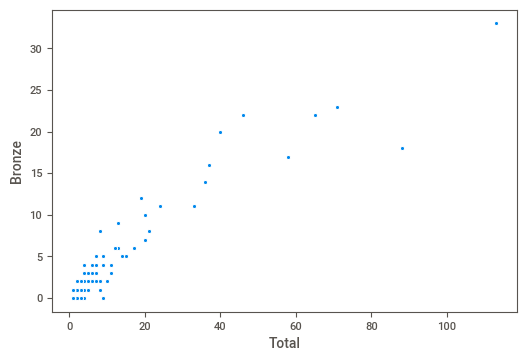

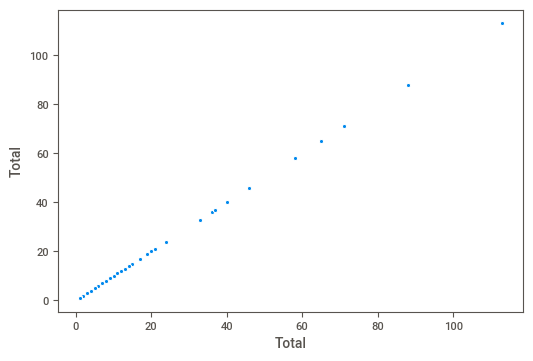

In [85]:
x = df.drop(['Country'],axis = 1)
for i in x.columns:
    sns.scatterplot(x= 'Total',y=x[i],data=df)
    plt.show()

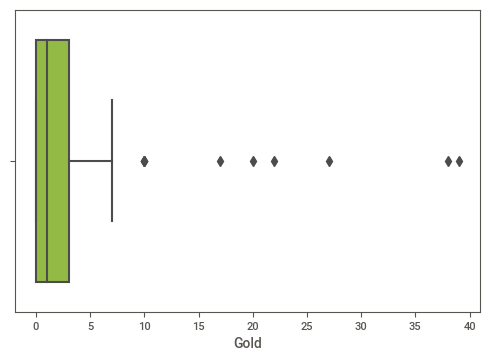

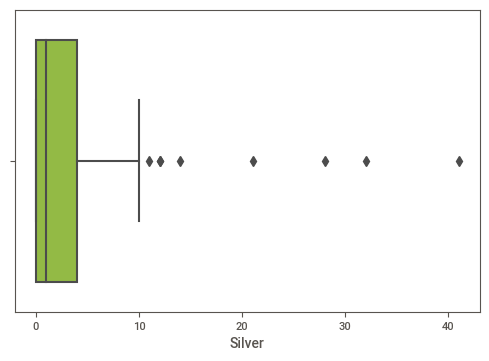

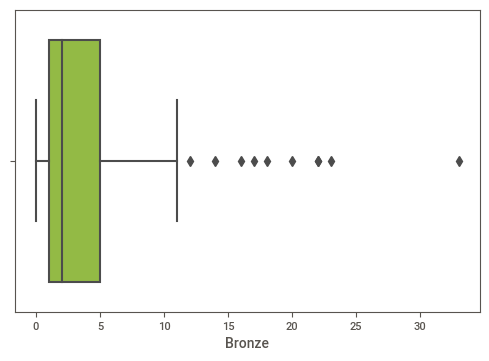

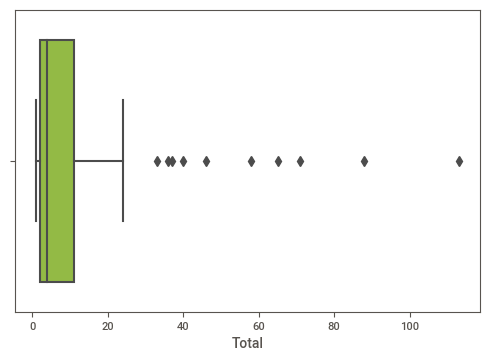

In [86]:
x = df.drop('Country',axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()

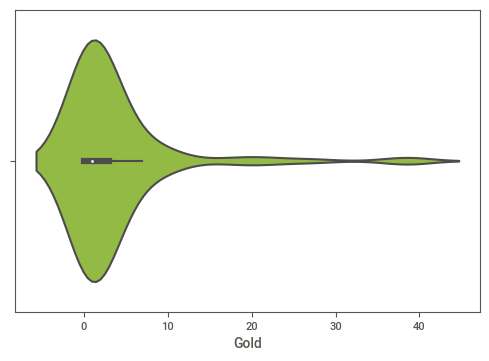

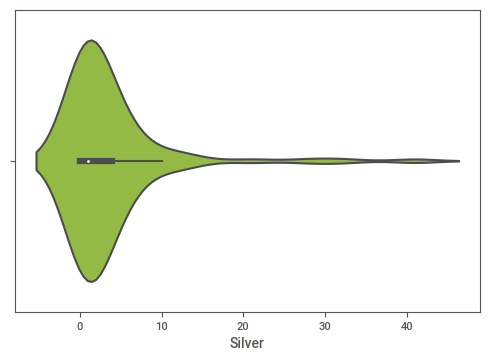

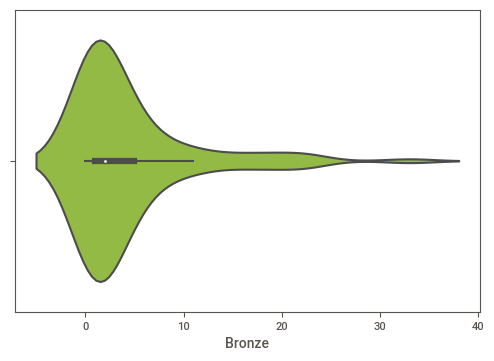

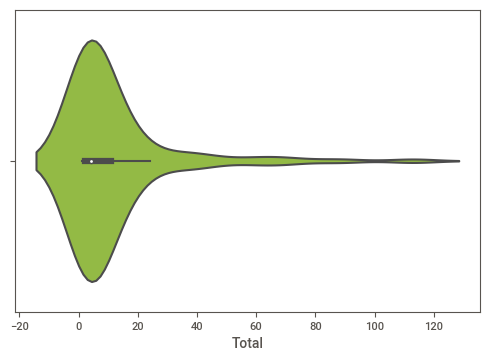

In [87]:
x = df.drop('Country',axis = 1)
for i in x.columns:
    sns.violinplot(x = i, data = x,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()

In [88]:
# Displaying Label , Value & percent in Pie Chart using "textinfo" parameter
for i in range(len(df['Country'])):
    tickets = df.iloc[i]
    status = ['Gold' , 'Bronze' , 'Silver' , 'Total']
    colors = ['#8BC34A','#D4E157','#FFB300','#FF7043']
    data = go.Pie(
                  values= tickets,
                  labels= status,
                  marker=dict(colors=colors),
                  textinfo='label+value+percent'
                  )


    layout = go.Layout(
                       title=dict(text = df['Country'][i],x=0.46,y=0.95,font_size=20),
                       width=800,
                       height=650
                      )

    fig = go.Figure(data=data,layout=layout)

    fig.show()